In [21]:
import scipy.signal 
import matplotlib.pyplot as plt
import numpy as np

/Users/rickyvian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


250 piece of data.


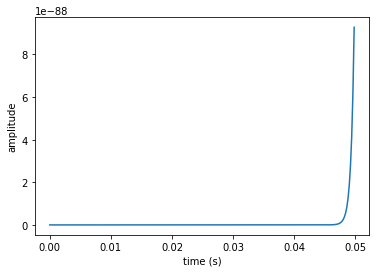

Proceeds to Channel with the following signal:  [  1.91855567e-136   3.16253097e-136   5.21100454e-136   8.58290683e-136
   1.41310238e-135   2.32562206e-135   3.82587636e-135   6.29142474e-135
   1.03417340e-134   1.69927631e-134   2.79100700e-134   4.58230644e-134
   7.52027316e-134   1.23369949e-133   2.02307244e-133   3.31619277e-133
   5.43368406e-133   8.89969822e-133   1.45707686e-132   2.38460210e-132
   3.90099744e-132   6.37913351e-132   1.04273512e-131   1.70377637e-131
   2.78277097e-131   4.54327075e-131   7.41457147e-131   1.20956657e-130
   1.97242172e-130   3.21511166e-130   5.23864087e-130   8.53232668e-130
   1.38912909e-129   2.26070564e-129   3.67766116e-129   5.98033745e-129
   9.72088823e-129   1.57947404e-128   2.56534226e-128   4.16489849e-128
   6.75911459e-128   1.09648193e-127   1.77803142e-127   2.88206431e-127
   4.66975595e-127   7.56329401e-127   1.22448668e-126   1.98163392e-126
   3.20567192e-126   5.18371363e-126   8.37894253e-126   1.35382866e-125
   

In [22]:
#input function
selector = int(input("Enter type of waves: Gaussian (0), Sine(1), Cosine(2), Square(3) (running for 10 seconds): "))
samplefreq = float(5000) #Hz
x = np.linspace(0,0.05,(0.05*samplefreq),endpoint = False)
correct = True
while(correct == True):
	if selector == 0:
		#fc,bw = map(float,input("input parameters for the gaussian curve (center frequency, fractional bandwith): ").split())
		#u,q,gaussian = scipy.signal.gausspulse(x,fc,bw,bwr=-1,retquad = True,retenv = True)
		a,b,c = map(float,input("input parameters for the gaussian curve (scalar, mean, variacne):").split())
		gaussian = a*np.exp(-((x-b)**2)/2*c**2)
		Tx = gaussian
	elif selector==1:
		a,b,c = map(float,input("input parameters for the sine curve(amplitude, frequency(Hz), phase): ").split())
		sine = a*np.sin(x*b-c)
		Tx = sine
	elif selector==2:
		a,b,c = map(float,input("input parameters for the cosine curve (amplitude, frequency(Hz), phase): ").split()) 
		cosine = a*np.cos(x*b-c)
		Tx = cosine
	elif selector==3:
		t = float(input("Time taken for square wave(s): "))
		x = np.linspace(0,t,1000000)
		square = scipy.signal.square(2*np.pi*x)
		Tx = square
	else:
		Tx = directDelta

	print (len(Tx), "piece of data.")

	plt.plot(x,Tx)#,"--",x,q,x,u)
	plt.xlabel('time (s)')
	plt.ylabel('amplitude')
	plt.show()
	plt.close()
	check = input("is this the intended input wave? (Yes/No) ")

	if(check == "yes" or check == "Yes"):
		correct = False
	else:
		print("Please re-input the waves parameters.")
		correct = True

print("Proceeds to Channel with the following signal: ", Tx)


lss is:  0.01
value of s:  0 and value of b: 0
Distance for the  1 eigen path is:  100.02
value of Bj:  0.00999362265421
value of tao:  0.0
number of samples:  [0]
value of s:  1 and value of b: 0
Distance for the  2 eigen path is:  100.7174
value of Bj:  -0.00999357819995
value of tao:  0.000464952330476
number of samples:  [0, 2]
value of s:  0 and value of b: 1
Distance for the  3 eigen path is:  234.4014
value of Bj:  0.00232298615633
value of tao:  0.0895875781222
number of samples:  [0, 2, 450]
value of s:  1 and value of b: 1
Distance for the  4 eigen path is:  225.3974
value of Bj:  -0.00230920541716
value of tao:  0.0835849525211
number of samples:  [0, 2, 450, 868]
value of s:  2 and value of b: 1
Distance for the  5 eigen path is:  234.4014
value of Bj:  0.00230081088103
value of tao:  0.0895875781222
number of samples:  [0, 2, 450, 868, 1316]
value of s:  1 and value of b: 2
Distance for the  6 eigen path is:  423.9623
value of Bj:  -0.000503868219923
value of tao:  0.21596

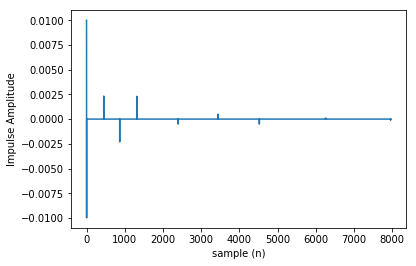

In [23]:
#########channel characteristics
h,r,d1,d2 = map(int,input("Channel Characteristics: Height, Range, d1 and d2 (meters): ").split())
f = int(input("Frequency of Transmitter (kHz): "))
eigen = int(input("Number of eigenpath: "))

#concerned variables
distance, lss, la, lb, angle = [0,0,0,0,0]

def findDistance(h,r,d1,d2,s,b):
	global distance
	if s>b or s==b :
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	if b>s :
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	return distance

def findlss(r):
	global lss
	lss =  1.0/r
	return lss

def findAngle(h,r,d1,d2,s,b):
	global angle
	if s>b or s==b:
		angle = 180*np.arctan2(r,((2*b*h)+d1-((-1)**(s-b))*d2))/np.pi
	if b>s:
		angle = 180*np.arctan2(r,((2*b*h)-d1+((-1)**(s-b))*d2))/np.pi
	if s==0 and b==0:
		angle = 0
	return angle

m = (1500.0/1023)
n = (1539.0/1650)

def findlb (angle, m, n,s,b):
	global lb
	lb = np.absolute((m*np.cos(np.pi*angle/180.0)-np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j))/(m*np.cos(np.pi*angle/180.0)+np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j)))
	return lb

salinity =  35 #value search on internet based on salinity in singapore
oceanT =  273+26 #26 celsius for shallow water about 70m deep.
ft = 21.9*10**(6-1520/oceanT)

def findla (salinity, ft, f, distance):
	global la
	la = np.exp(-0.998*distance*(((salinity*(2.34*10**-6)*ft*f)/(ft**2+f**2))+(((3.38*10**-6)*f**2)/(ft))))
	return la
d = 0
tao = 0
def findSamples(distance1, distance2):
	global tao, d
	tao = (distance1 - distance2)/1500 #speed of sound underwater m/s
	d += round(tao*5000,0) #time x frequency sampling = number of samples
	samples.append(int(d))
	return tao, d

#########def findDelay(tao,distance, distanceD):
#	findTao(distance, distanceD)
#	d = round(tao*10**9,0)/10**9 #frequency sampling
#	delay.append(d)

def findBj(Tx,s,b,e):
	findDistance(h,r,d1,d2,s,b)
	findAngle(h,r,d1,d2,s,b)
	print ("value of s: ", s, "and value of b:", b)
	print ("Distance for the ", e, "eigen path is: ", round(distance,4))
	findla(salinity, ft, f, distance)
	Bj = lss*la*(findlb(angle,m,n,s,b)**b)*(directDelta)
	if s%2!=0:
		Bj = -Bj
	print("value of Bj: ", Bj)
	Bja.append(Bj)

	return Bja, distance


findlss(r)
distanceD = findDistance(h,r,d1,d2,0,0)
print ("lss is: ", round(lss,3))

########Direct Delta function
directDelta = 1

#########iterating function (non-recursive)
Bja = []
samples = [] #need to find how many samples for the DELAY!!!!!!!!!!!!!!!!!!!
s,b,e = [0,0,0]
	
for j in range (int(eigen/3)+1):
	for i in range (3):
		if eigen == e:
			break
		e += 1
		findBj(Tx,s,b,e)
		findSamples(distance, distanceD)
		print ("value of tao: ", tao)
		print ("number of samples: ", samples)

#to change the s and b values
		if i == 0 or i == 2:
			s+= 1
		elif i == 1:
			s-= 1
			b+= 1

Hn = np.zeros(int(d)+10)
j = 0
k = 0

while j <= int(d):
    if j == samples[k]:
        Hn[j] = Bja[k]
        print("value of samples[k]: ", samples[k])
        print("value of Hn[j]: ", Hn[j])
        k += 1
    j += 1

x_axis = np.zeros(int(d))

########plotting the model
print ("Impulse Response:", Bja)
print(len(Hn)," piece of data")
plt.xlabel("sample (n)")
plt.ylabel("Impulse Amplitude")
plt.plot(Hn)
plt.show()

In [24]:
#convolution code
s1 = Tx
s2 = Hn
print ('s1: ', s1)
print ('s2: ', s2)
s3 = np.flip(s2,0)
length = len(s1)+len(s2)-1

s1_zeros = length - len(s1)
s3_zeros = length - len(s3)

temp_s1 = np.concatenate((np.zeros(s1_zeros),s1))
temp_s2 = np.concatenate((s3, np.zeros(s3_zeros)))
print('temp_s1 (pure input): ', temp_s1)
print('temp_s2 (pure input): ', temp_s2)

mul = 0
out = np.zeros(length)

for i in range(length):
	if(i==0):
		mul = temp_s1*temp_s2
		#print('temp_s2 (when i==0): ', temp_s2)
		#print('temp_s1 (when i==0): ', temp_s1)
		out[i] = sum(mul)
	else:
		temp_s1 = np.concatenate((temp_s1[1:],temp_s1[:1]))#left shift, not sure how to do right shift
		#print('temp_s2: ', temp_s2)
		#print('temp_s1: ', temp_s1)
		mul = temp_s1*temp_s2
		out[i] = sum(mul)
#out = []
#out = np.convolve(s1,s2,mode = "full")

s1:  [  1.91855567e-136   3.16253097e-136   5.21100454e-136   8.58290683e-136
   1.41310238e-135   2.32562206e-135   3.82587636e-135   6.29142474e-135
   1.03417340e-134   1.69927631e-134   2.79100700e-134   4.58230644e-134
   7.52027316e-134   1.23369949e-133   2.02307244e-133   3.31619277e-133
   5.43368406e-133   8.89969822e-133   1.45707686e-132   2.38460210e-132
   3.90099744e-132   6.37913351e-132   1.04273512e-131   1.70377637e-131
   2.78277097e-131   4.54327075e-131   7.41457147e-131   1.20956657e-130
   1.97242172e-130   3.21511166e-130   5.23864087e-130   8.53232668e-130
   1.38912909e-129   2.26070564e-129   3.67766116e-129   5.98033745e-129
   9.72088823e-129   1.57947404e-128   2.56534226e-128   4.16489849e-128
   6.75911459e-128   1.09648193e-127   1.77803142e-127   2.88206431e-127
   4.66975595e-127   7.56329401e-127   1.22448668e-126   1.98163392e-126
   3.20567192e-126   5.18371363e-126   8.37894253e-126   1.35382866e-125
   2.18657551e-125   3.53013680e-125   5.69698

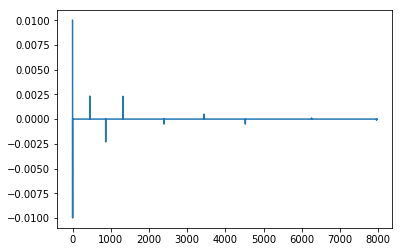

In [34]:
plt.plot(s2)
plt.show()

Final signal:  [  1.91733214e-138   3.16051412e-138   3.29035769e-138 ...,
   0.00000000e+000   0.00000000e+000   0.00000000e+000]


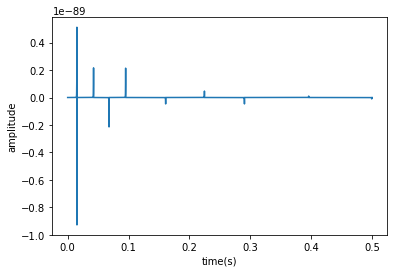

In [25]:
#########plotting the model
#print ("Delay Value: ", delay)
#print ("Impulse Response:", Hn)
print ("Final signal: ", out)
x_axis = np.linspace(0,0.5,len(out))
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.plot(x_axis, out)
plt.show()
